##  AIML - Heart Disease Prediction 

In [84]:
# importing required libraries:-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#classifiction fucntion.
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

# !pip install catboost
from catboost import CatBoostClassifier



In [85]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [106]:
df.shape

(303, 14)

In [107]:
df.size

4242

169:	learn: 0.0014002	total: 139ms	remaining: 24.5ms
170:	learn: 0.0013879	total: 141ms	remaining: 23.8ms
171:	learn: 0.0013878	total: 142ms	remaining: 23.1ms
172:	learn: 0.0013780	total: 143ms	remaining: 22.3ms
173:	learn: 0.0013781	total: 144ms	remaining: 21.5ms
174:	learn: 0.0013780	total: 145ms	remaining: 20.6ms
175:	learn: 0.0013780	total: 146ms	remaining: 19.8ms
176:	learn: 0.0013781	total: 147ms	remaining: 19ms
177:	learn: 0.0013780	total: 147ms	remaining: 18.2ms
178:	learn: 0.0013778	total: 148ms	remaining: 17.3ms
179:	learn: 0.0013778	total: 148ms	remaining: 16.5ms
180:	learn: 0.0013778	total: 149ms	remaining: 15.6ms
181:	learn: 0.0013777	total: 149ms	remaining: 14.8ms
182:	learn: 0.0013772	total: 150ms	remaining: 14ms
183:	learn: 0.0013773	total: 151ms	remaining: 13.2ms
184:	learn: 0.0013773	total: 152ms	remaining: 12.4ms
185:	learn: 0.0013754	total: 153ms	remaining: 11.6ms
186:	learn: 0.0013632	total: 155ms	remaining: 10.8ms
187:	learn: 0.0013626	total: 157ms	remaining: 10ms

140:	learn: 0.2365782	total: 159ms	remaining: 66.4ms
141:	learn: 0.2353227	total: 160ms	remaining: 65.3ms
142:	learn: 0.2341075	total: 161ms	remaining: 64.1ms
143:	learn: 0.2333755	total: 161ms	remaining: 62.8ms
144:	learn: 0.2322949	total: 162ms	remaining: 61.4ms
145:	learn: 0.2313725	total: 163ms	remaining: 60.1ms
146:	learn: 0.2303053	total: 163ms	remaining: 58.8ms
147:	learn: 0.2292384	total: 164ms	remaining: 57.5ms
148:	learn: 0.2281440	total: 164ms	remaining: 56.2ms
149:	learn: 0.2267742	total: 165ms	remaining: 54.9ms
150:	learn: 0.2259082	total: 165ms	remaining: 53.7ms
151:	learn: 0.2253023	total: 166ms	remaining: 52.4ms
152:	learn: 0.2243129	total: 166ms	remaining: 51.1ms
153:	learn: 0.2232098	total: 167ms	remaining: 49.9ms
154:	learn: 0.2225306	total: 168ms	remaining: 48.6ms
155:	learn: 0.2210040	total: 168ms	remaining: 47.4ms
156:	learn: 0.2198550	total: 169ms	remaining: 46.2ms
157:	learn: 0.2190960	total: 169ms	remaining: 45ms
158:	learn: 0.2183788	total: 169ms	remaining: 43

9:	learn: 0.6911109	total: 22.9ms	remaining: 206ms
10:	learn: 0.6909112	total: 25.5ms	remaining: 207ms
11:	learn: 0.6907275	total: 27.1ms	remaining: 199ms
12:	learn: 0.6905039	total: 28.3ms	remaining: 190ms
13:	learn: 0.6902811	total: 29.6ms	remaining: 182ms
14:	learn: 0.6901304	total: 32.4ms	remaining: 184ms
15:	learn: 0.6899940	total: 33.8ms	remaining: 177ms
16:	learn: 0.6898354	total: 35.1ms	remaining: 172ms
17:	learn: 0.6896574	total: 36.4ms	remaining: 166ms
18:	learn: 0.6894384	total: 36.7ms	remaining: 156ms
19:	learn: 0.6891579	total: 36.8ms	remaining: 147ms
20:	learn: 0.6889998	total: 38.3ms	remaining: 144ms
21:	learn: 0.6887432	total: 38.7ms	remaining: 137ms
22:	learn: 0.6885940	total: 40ms	remaining: 134ms
23:	learn: 0.6884277	total: 41.3ms	remaining: 131ms
24:	learn: 0.6882271	total: 42.9ms	remaining: 129ms
25:	learn: 0.6879896	total: 44.3ms	remaining: 126ms
26:	learn: 0.6878701	total: 46.2ms	remaining: 125ms
27:	learn: 0.6877157	total: 48.3ms	remaining: 124ms
28:	learn: 0.68

8:	learn: 0.6861189	total: 12.7ms	remaining: 270ms
9:	learn: 0.6853337	total: 14.5ms	remaining: 275ms
10:	learn: 0.6845648	total: 15.9ms	remaining: 273ms
11:	learn: 0.6839474	total: 17.1ms	remaining: 268ms
12:	learn: 0.6832203	total: 18.2ms	remaining: 262ms
13:	learn: 0.6824548	total: 19.3ms	remaining: 256ms
14:	learn: 0.6817589	total: 20.5ms	remaining: 253ms
15:	learn: 0.6809532	total: 22ms	remaining: 253ms
16:	learn: 0.6801956	total: 23.2ms	remaining: 250ms
17:	learn: 0.6794806	total: 24.4ms	remaining: 247ms
18:	learn: 0.6787618	total: 25.4ms	remaining: 242ms
19:	learn: 0.6781714	total: 26ms	remaining: 234ms
20:	learn: 0.6774301	total: 27.4ms	remaining: 233ms
21:	learn: 0.6766687	total: 28.4ms	remaining: 230ms
22:	learn: 0.6759836	total: 29.4ms	remaining: 226ms
23:	learn: 0.6752302	total: 30.4ms	remaining: 223ms
24:	learn: 0.6744179	total: 31.8ms	remaining: 223ms
25:	learn: 0.6738119	total: 33.1ms	remaining: 221ms
26:	learn: 0.6731267	total: 33.5ms	remaining: 214ms
27:	learn: 0.67268

18:	learn: 0.1761914	total: 19.1ms	remaining: 182ms
19:	learn: 0.1681671	total: 20.1ms	remaining: 181ms
20:	learn: 0.1596824	total: 21ms	remaining: 179ms
21:	learn: 0.1552751	total: 21.2ms	remaining: 172ms
22:	learn: 0.1482476	total: 22.2ms	remaining: 171ms
23:	learn: 0.1419246	total: 23.5ms	remaining: 172ms
24:	learn: 0.1375416	total: 24.5ms	remaining: 172ms
25:	learn: 0.1311836	total: 25.7ms	remaining: 172ms
26:	learn: 0.1261096	total: 26.8ms	remaining: 171ms
27:	learn: 0.1211753	total: 27.8ms	remaining: 171ms
28:	learn: 0.1202767	total: 27.9ms	remaining: 165ms
29:	learn: 0.1159701	total: 29.2ms	remaining: 166ms
30:	learn: 0.1124562	total: 30.4ms	remaining: 165ms
31:	learn: 0.1088642	total: 31.7ms	remaining: 166ms
32:	learn: 0.1052974	total: 32.8ms	remaining: 166ms
33:	learn: 0.1021354	total: 34ms	remaining: 166ms
34:	learn: 0.0993584	total: 35.1ms	remaining: 165ms
35:	learn: 0.0968259	total: 36.2ms	remaining: 165ms
36:	learn: 0.0934817	total: 37.3ms	remaining: 164ms
37:	learn: 0.089

78:	learn: 0.0021065	total: 104ms	remaining: 160ms
79:	learn: 0.0020803	total: 105ms	remaining: 158ms
80:	learn: 0.0020478	total: 108ms	remaining: 158ms
81:	learn: 0.0020217	total: 109ms	remaining: 157ms
82:	learn: 0.0019893	total: 111ms	remaining: 156ms
83:	learn: 0.0019687	total: 112ms	remaining: 155ms
84:	learn: 0.0019484	total: 113ms	remaining: 153ms
85:	learn: 0.0019305	total: 114ms	remaining: 151ms
86:	learn: 0.0019300	total: 115ms	remaining: 149ms
87:	learn: 0.0019069	total: 116ms	remaining: 148ms
88:	learn: 0.0018881	total: 117ms	remaining: 146ms
89:	learn: 0.0018706	total: 118ms	remaining: 145ms
90:	learn: 0.0018512	total: 119ms	remaining: 143ms
91:	learn: 0.0018325	total: 121ms	remaining: 142ms
92:	learn: 0.0018138	total: 122ms	remaining: 140ms
93:	learn: 0.0017974	total: 123ms	remaining: 139ms
94:	learn: 0.0017780	total: 124ms	remaining: 137ms
95:	learn: 0.0017556	total: 126ms	remaining: 136ms
96:	learn: 0.0017345	total: 127ms	remaining: 135ms
97:	learn: 0.0017291	total: 128

In [86]:
df.info() # all features are numeric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [87]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [88]:
df.isnull().mean() #no null values present.

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [89]:
# Split the data into features and target variable
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

In [90]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [91]:
y.nunique()

2

In [92]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

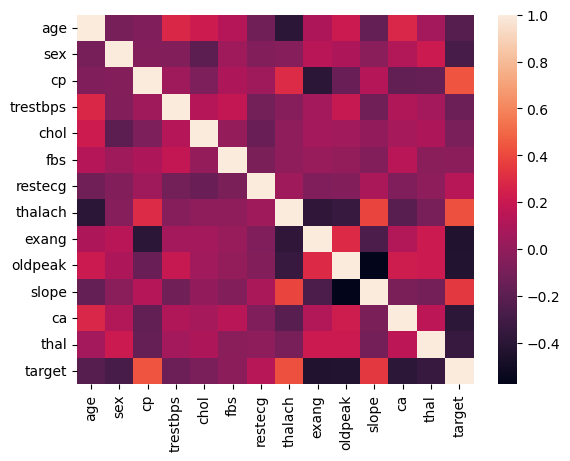

In [93]:
import seaborn as sns

sns.heatmap(df.corr())

In [94]:
# Scale numerical variablee

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

{'whiskers': [<matplotlib.lines.Line2D at 0x3008d4050>,
 'caps': [<matplotlib.lines.Line2D at 0x3053f7e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x3053f64d0>,
 'medians': [<matplotlib.lines.Line2D at 0x305634f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x305635710>,
 'means': []}

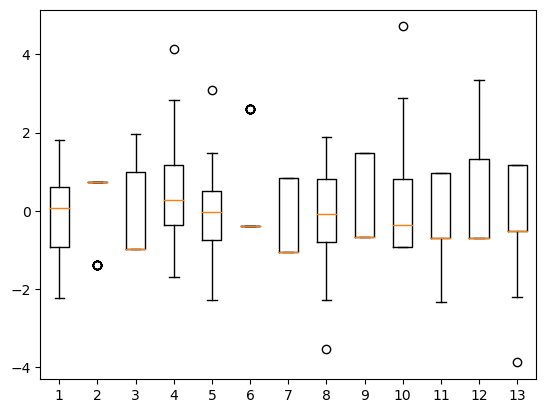

In [95]:
plt.boxplot(X_test)

{'whiskers': [<matplotlib.lines.Line2D at 0x30575f890>,
 'caps': [<matplotlib.lines.Line2D at 0x305770ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x30575f050>,
 'medians': [<matplotlib.lines.Line2D at 0x305771d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x3056f24d0>,
 'means': []}

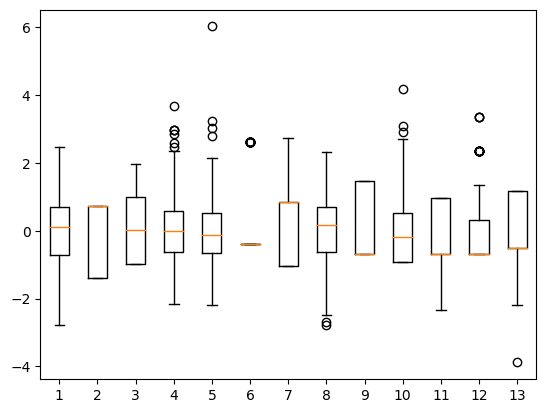

In [96]:
plt.boxplot(X_train)

## Applying different Machine Learning Algorithms¶

In [97]:
# applying differe classifer with default paramaters 
import time

def evaluate_classification_models(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(),
        "Ridge Classifier": RidgeClassifier(),
        "SGD Classifier": SGDClassifier(),
        "Support Vector Machine": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Bagging Classifier": BaggingClassifier(),
        "Extra Trees Classifier": ExtraTreesClassifier(),
        "AdaBoost Classifier": AdaBoostClassifier(),
        "XGBoost Classifier": XGBClassifier(),
        "CatBoost Classifier": CatBoostClassifier(),
#         "LightGBM Classifier": LGBMClassifier()
    }

    results = []

    for name, model in models.items():
        print(f"Evaluating {name}...")
        
        start_time = time.time()  # Start time
        
        model.fit(X_train, y_train)
        
        end_time = time.time()  # End time
        execution_time = end_time - start_time  # Total time taken
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        precision = precision_score(y_test, y_pred_test)
        recall = recall_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)

        results.append({
            "Model": name,
            "Train Accuracy": accuracy_train,
            "Test Accuracy": accuracy_test,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Execution Time (s)": execution_time  # Add execution time to results
        })

    return results

In [98]:
results = evaluate_classification_models(X_train, X_test, y_train, y_test)


Evaluating Logistic Regression...
Evaluating Ridge Classifier...
Evaluating SGD Classifier...
Evaluating Support Vector Machine...
Evaluating Decision Tree...
Evaluating K-Nearest Neighbors...
Evaluating Random Forest...
Evaluating Bagging Classifier...
Evaluating Extra Trees Classifier...
Evaluating AdaBoost Classifier...
Evaluating XGBoost Classifier...
Evaluating CatBoost Classifier...
Learning rate set to 0.005621
0:	learn: 0.6884219	total: 1.84ms	remaining: 1.84s
1:	learn: 0.6846993	total: 2.52ms	remaining: 1.26s
2:	learn: 0.6804470	total: 3.05ms	remaining: 1.01s
3:	learn: 0.6762242	total: 3.35ms	remaining: 835ms
4:	learn: 0.6716783	total: 3.73ms	remaining: 743ms
5:	learn: 0.6672808	total: 4.1ms	remaining: 679ms
6:	learn: 0.6639958	total: 4.45ms	remaining: 631ms
7:	learn: 0.6601980	total: 4.77ms	remaining: 592ms
8:	learn: 0.6563767	total: 5.21ms	remaining: 574ms
9:	learn: 0.6525103	total: 5.62ms	remaining: 556ms
10:	learn: 0.6483671	total: 5.87ms	remaining: 528ms
11:	learn: 0.6448

487:	learn: 0.1969988	total: 187ms	remaining: 196ms
488:	learn: 0.1968648	total: 187ms	remaining: 195ms
489:	learn: 0.1964348	total: 187ms	remaining: 195ms
490:	learn: 0.1962841	total: 188ms	remaining: 195ms
491:	learn: 0.1959971	total: 188ms	remaining: 194ms
492:	learn: 0.1957026	total: 189ms	remaining: 194ms
493:	learn: 0.1955695	total: 189ms	remaining: 193ms
494:	learn: 0.1953953	total: 189ms	remaining: 193ms
495:	learn: 0.1950400	total: 189ms	remaining: 193ms
496:	learn: 0.1947469	total: 190ms	remaining: 192ms
497:	learn: 0.1945522	total: 190ms	remaining: 192ms
498:	learn: 0.1943765	total: 190ms	remaining: 191ms
499:	learn: 0.1940251	total: 191ms	remaining: 191ms
500:	learn: 0.1937779	total: 191ms	remaining: 190ms
501:	learn: 0.1934710	total: 191ms	remaining: 190ms
502:	learn: 0.1932006	total: 192ms	remaining: 189ms
503:	learn: 0.1928386	total: 192ms	remaining: 189ms
504:	learn: 0.1926002	total: 192ms	remaining: 189ms
505:	learn: 0.1924010	total: 193ms	remaining: 188ms
506:	learn: 

957:	learn: 0.1094983	total: 376ms	remaining: 16.5ms
958:	learn: 0.1093678	total: 376ms	remaining: 16.1ms
959:	learn: 0.1092846	total: 377ms	remaining: 15.7ms
960:	learn: 0.1091238	total: 377ms	remaining: 15.3ms
961:	learn: 0.1089827	total: 377ms	remaining: 14.9ms
962:	learn: 0.1088583	total: 378ms	remaining: 14.5ms
963:	learn: 0.1087581	total: 378ms	remaining: 14.1ms
964:	learn: 0.1086185	total: 378ms	remaining: 13.7ms
965:	learn: 0.1083970	total: 379ms	remaining: 13.3ms
966:	learn: 0.1082274	total: 379ms	remaining: 12.9ms
967:	learn: 0.1081591	total: 379ms	remaining: 12.5ms
968:	learn: 0.1080794	total: 380ms	remaining: 12.1ms
969:	learn: 0.1080102	total: 380ms	remaining: 11.7ms
970:	learn: 0.1079082	total: 380ms	remaining: 11.4ms
971:	learn: 0.1077906	total: 381ms	remaining: 11ms
972:	learn: 0.1076431	total: 381ms	remaining: 10.6ms
973:	learn: 0.1074290	total: 381ms	remaining: 10.2ms
974:	learn: 0.1072536	total: 382ms	remaining: 9.79ms
975:	learn: 0.1070567	total: 382ms	remaining: 9.

In [99]:
results_df = pd.DataFrame(results)
results_df.to_csv('classification_results.csv', index=False)


In [100]:
best_model = max(results, key=lambda x: x['F1 Score'])
print("Best Model:", best_model['Model'])
print("Precision:", best_model['Precision'])
print("Recall:", best_model['Recall'])
print("F1 Score:", best_model['F1 Score'])
print("Train Accuracy:", best_model['Train Accuracy'])
print("Test Accuracy:", best_model['Test Accuracy'])


Best Model: K-Nearest Neighbors
Precision: 0.9333333333333333
Recall: 0.875
F1 Score: 0.9032258064516129
Train Accuracy: 0.8553719008264463
Test Accuracy: 0.9016393442622951


## lets print top 3 models from csv.

In [101]:
import pandas as pd

# Read the CSV file into a DataFrame
results_df = pd.read_csv('classification_results.csv')

# Sort the DataFrame based on the F1 score in descending order
sorted_results_df = results_df.sort_values(by='F1 Score', ascending=False)

# Print the top three models with parameters
print("Top Three Models:")
for idx, row in sorted_results_df.head(5).iterrows():
    print(f"{idx + 1}. Model: {row['Model']}")
    print(f"F1 Score: {row['F1 Score']}")
    print(f"Precision: {row['Precision']}")
    print(f"Recall: {row['Recall']}")
    print(f"Train Accuracy: {row['Train Accuracy']}")
    print(f"Test Accuracy: {row['Test Accuracy']}")
    print(f"Execution Time (s): {row['Execution Time (s)']}")
    
    print("\n")


Top Three Models:
6. Model: K-Nearest Neighbors
F1 Score: 0.9032258064516128
Precision: 0.9333333333333332
Recall: 0.875
Train Accuracy: 0.8553719008264463
Test Accuracy: 0.9016393442622952
Execution Time (s): 0.00285005569458


2. Model: Ridge Classifier
F1 Score: 0.875
Precision: 0.875
Recall: 0.875
Train Accuracy: 0.859504132231405
Test Accuracy: 0.8688524590163934
Execution Time (s): 0.0068068504333496


4. Model: Support Vector Machine
F1 Score: 0.870967741935484
Precision: 0.9
Recall: 0.84375
Train Accuracy: 0.9214876033057852
Test Accuracy: 0.8688524590163934
Execution Time (s): 0.0023350715637207


7. Model: Random Forest
F1 Score: 0.8615384615384615
Precision: 0.8484848484848485
Recall: 0.875
Train Accuracy: 1.0
Test Accuracy: 0.8524590163934426
Execution Time (s): 0.0475740432739257


1. Model: Logistic Regression
F1 Score: 0.8571428571428571
Precision: 0.8709677419354839
Recall: 0.84375
Train Accuracy: 0.8636363636363636
Test Accuracy: 0.8524590163934426
Execution Time (s): 

## modifying above code to do hyperparamter for all these models.

In [102]:
def evaluate_classification_models_with_hyperparameter_tuning(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(),
        "Ridge Classifier": RidgeClassifier(),
        "SGD Classifier": SGDClassifier(),
        "Support Vector Machine": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Bagging Classifier": BaggingClassifier(),
        "Extra Trees Classifier": ExtraTreesClassifier(),
        "AdaBoost Classifier": AdaBoostClassifier(),
        "XGBoost Classifier": XGBClassifier(),
        "CatBoost Classifier": CatBoostClassifier(),
#         "LightGBM Classifier": LGBMClassifier()
    }

    results = []

    for name, model in models.items():
        print(f"Evaluating {name} with Hyperparameter Tuning...")

        # Define hyperparameters grid for each model
        param_grid = {}

        if name == "Logistic Regression":
            param_grid = {
                'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'penalty': ['l1', 'l2']
            }
        elif name == "Ridge Classifier":
            param_grid = {
                'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
            }
        elif name == "SGD Classifier":
            param_grid = {
                'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                'penalty': ['l2', 'l1', 'elasticnet'],
                'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
            }
        elif name == "Support Vector Machine":
            param_grid = {
                'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
            }
        elif name == "Decision Tree":
            param_grid = {
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 5, 10, 20, 50, 100],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        elif name == "K-Nearest Neighbors":
            param_grid = {
                'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }
        elif name == "Random Forest":
            param_grid = {
                'n_estimators': [50, 100, 200],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth': [None, 5, 10, 20, 50, 100],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        elif name == "Bagging Classifier":
            param_grid = {
                'n_estimators': [50, 100, 200],
                'max_samples': [0.5, 0.7, 1.0],
                'max_features': [0.5, 0.7, 1.0]
            }
        elif name == "Extra Trees Classifier":
            param_grid = {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 5, 10, 20, 50, 100],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        elif name == "AdaBoost Classifier":
            param_grid = {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.001, 0.01, 0.1, 1]
            }
        elif name == "XGBoost Classifier":
            param_grid = {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.001, 0.01, 0.1, 1],
                'max_depth': [3, 5, 7, 9],
                'gamma': [0, 0.1, 0.2, 0.3],
                'subsample': [0.5, 0.7, 0.9],
                'colsample_bytree': [0.5, 0.7, 0.9]
            }
        elif name == "CatBoost Classifier":
            param_grid = {
                'iterations': [50, 100, 200],
                'learning_rate': [0.001, 0.01, 0.1, 1],
                'depth': [3, 5, 7, 9]
            }
        elif name == "LightGBM Classifier":
            param_grid = {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.001, 0.01, 0.1, 1],
                'num_leaves': [31, 63, 127]
            }

        # Perform GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Get the best model and its parameters
        best_model = grid_search.best_estimator_

        # Evaluate the best model
        y_pred_train = best_model.predict(X_train)
        y_pred_test = best_model.predict(X_test)

        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        precision = precision_score(y_test, y_pred_test)
        recall = recall_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)

        results.append({
            "Model": name,
            "Best Parameters": grid_search.best_params_,
            "Train Accuracy": accuracy_train,
            "Test Accuracy": accuracy_test,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        })

    return results


In [103]:
results_hyperparameter_tuning = evaluate_classification_models_with_hyperparameter_tuning(X_train, X_test, y_train, y_test)


Evaluating Logistic Regression with Hyperparameter Tuning...
Evaluating Ridge Classifier with Hyperparameter Tuning...
Evaluating SGD Classifier with Hyperparameter Tuning...


/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Evaluating Support Vector Machine with Hyperparameter Tuning...
Evaluating Decision Tree with Hyperparameter Tuning...
Evaluating K-Nearest Neighbors with Hyperparameter Tuning...


/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/vi

Evaluating Random Forest with Hyperparameter Tuning...
Evaluating Bagging Classifier with Hyperparameter Tuning...
Evaluating Extra Trees Classifier with Hyperparameter Tuning...
Evaluating AdaBoost Classifier with Hyperparameter Tuning...
Evaluating XGBoost Classifier with Hyperparameter Tuning...
Evaluating CatBoost Classifier with Hyperparameter Tuning...
55:	learn: 0.6822745	total: 104ms	remaining: 81.5ms
56:	learn: 0.6820552	total: 105ms	remaining: 78.9ms
57:	learn: 0.6818655	total: 105ms	remaining: 76.3ms
58:	learn: 0.6815628	total: 106ms	remaining: 73.3ms
59:	learn: 0.6813811	total: 108ms	remaining: 71.8ms
60:	learn: 0.6812485	total: 110ms	remaining: 70.4ms
61:	learn: 0.6810637	total: 113ms	remaining: 69.1ms
62:	learn: 0.6808953	total: 115ms	remaining: 67.6ms
63:	learn: 0.6807581	total: 116ms	remaining: 65.5ms
64:	learn: 0.6806028	total: 118ms	remaining: 63.4ms
65:	learn: 0.6804714	total: 119ms	remaining: 61.3ms
66:	learn: 0.6802571	total: 120ms	remaining: 59.3ms
67:	learn: 0.68

8:	learn: 0.6689991	total: 933us	remaining: 9.44ms
9:	learn: 0.6663401	total: 1.01ms	remaining: 9.11ms
10:	learn: 0.6635385	total: 1.09ms	remaining: 8.82ms
11:	learn: 0.6617040	total: 1.17ms	remaining: 8.58ms
12:	learn: 0.6590966	total: 1.25ms	remaining: 8.35ms
13:	learn: 0.6568641	total: 1.32ms	remaining: 8.14ms
14:	learn: 0.6541493	total: 1.4ms	remaining: 7.95ms
15:	learn: 0.6521003	total: 1.48ms	remaining: 7.78ms
16:	learn: 0.6504791	total: 1.59ms	remaining: 7.75ms
17:	learn: 0.6488149	total: 1.66ms	remaining: 7.58ms
18:	learn: 0.6467614	total: 1.74ms	remaining: 7.42ms
19:	learn: 0.6443975	total: 1.82ms	remaining: 7.26ms
20:	learn: 0.6418873	total: 1.9ms	remaining: 7.13ms
21:	learn: 0.6395072	total: 1.98ms	remaining: 7ms
22:	learn: 0.6365644	total: 2.05ms	remaining: 6.86ms
23:	learn: 0.6338751	total: 2.13ms	remaining: 6.76ms
24:	learn: 0.6315189	total: 2.22ms	remaining: 6.66ms
25:	learn: 0.6289541	total: 2.3ms	remaining: 6.54ms
26:	learn: 0.6267056	total: 2.38ms	remaining: 6.45ms
27

56:	learn: 0.0104548	total: 20.8ms	remaining: 52.3ms
57:	learn: 0.0103965	total: 21ms	remaining: 51.4ms
58:	learn: 0.0103762	total: 21.2ms	remaining: 50.6ms
59:	learn: 0.0100009	total: 21.4ms	remaining: 49.8ms
60:	learn: 0.0097833	total: 21.5ms	remaining: 49.1ms
61:	learn: 0.0092017	total: 21.7ms	remaining: 48.3ms
62:	learn: 0.0089013	total: 22.6ms	remaining: 49.2ms
63:	learn: 0.0084254	total: 22.8ms	remaining: 48.5ms
64:	learn: 0.0080436	total: 23.1ms	remaining: 48ms
65:	learn: 0.0077887	total: 23.5ms	remaining: 47.7ms
66:	learn: 0.0076315	total: 23.9ms	remaining: 47.4ms
67:	learn: 0.0074858	total: 24.3ms	remaining: 47.1ms
68:	learn: 0.0074297	total: 24.6ms	remaining: 46.7ms
69:	learn: 0.0072608	total: 24.8ms	remaining: 46.1ms
70:	learn: 0.0069493	total: 25ms	remaining: 45.4ms
71:	learn: 0.0069494	total: 25.1ms	remaining: 44.7ms
72:	learn: 0.0069491	total: 25.3ms	remaining: 44ms
73:	learn: 0.0069475	total: 25.4ms	remaining: 43.3ms
74:	learn: 0.0067794	total: 25.6ms	remaining: 42.7ms
7

100:	learn: 0.4226744	total: 29.2ms	remaining: 28.6ms
101:	learn: 0.4213979	total: 29.4ms	remaining: 28.2ms
102:	learn: 0.4199657	total: 29.6ms	remaining: 27.8ms
103:	learn: 0.4184941	total: 29.7ms	remaining: 27.4ms
104:	learn: 0.4171749	total: 29.9ms	remaining: 27.1ms
105:	learn: 0.4157724	total: 30.1ms	remaining: 26.7ms
106:	learn: 0.4140002	total: 30.2ms	remaining: 26.3ms
107:	learn: 0.4124046	total: 30.4ms	remaining: 25.9ms
108:	learn: 0.4115288	total: 30.6ms	remaining: 25.5ms
109:	learn: 0.4103713	total: 32.1ms	remaining: 26.2ms
110:	learn: 0.4091018	total: 42.9ms	remaining: 34.4ms
111:	learn: 0.4078255	total: 43.1ms	remaining: 33.8ms
112:	learn: 0.4065586	total: 43.5ms	remaining: 33.5ms
113:	learn: 0.4053543	total: 44.6ms	remaining: 33.6ms
114:	learn: 0.4048992	total: 44.7ms	remaining: 33.1ms
115:	learn: 0.4042085	total: 44.9ms	remaining: 32.5ms
116:	learn: 0.4033610	total: 45.1ms	remaining: 32ms
117:	learn: 0.4023528	total: 45.3ms	remaining: 31.4ms
118:	learn: 0.4011712	total: 4

62:	learn: 0.6431141	total: 51.7ms	remaining: 112ms
63:	learn: 0.6424093	total: 52ms	remaining: 110ms
64:	learn: 0.6416757	total: 52.5ms	remaining: 109ms
65:	learn: 0.6410159	total: 53.1ms	remaining: 108ms
66:	learn: 0.6400676	total: 53.7ms	remaining: 107ms
67:	learn: 0.6393881	total: 54.3ms	remaining: 105ms
68:	learn: 0.6388805	total: 55.3ms	remaining: 105ms
69:	learn: 0.6382393	total: 55.9ms	remaining: 104ms
70:	learn: 0.6374776	total: 56.3ms	remaining: 102ms
71:	learn: 0.6367872	total: 57.6ms	remaining: 102ms
72:	learn: 0.6362279	total: 58.2ms	remaining: 101ms
73:	learn: 0.6353089	total: 60.4ms	remaining: 103ms
74:	learn: 0.6347079	total: 61.3ms	remaining: 102ms
75:	learn: 0.6339661	total: 61.6ms	remaining: 101ms
76:	learn: 0.6333360	total: 61.9ms	remaining: 98.9ms
77:	learn: 0.6327796	total: 62.1ms	remaining: 97.1ms
78:	learn: 0.6318935	total: 62.4ms	remaining: 95.5ms
79:	learn: 0.6313724	total: 62.6ms	remaining: 93.9ms
80:	learn: 0.6306390	total: 63.2ms	remaining: 92.8ms
81:	learn

10:	learn: 0.4871773	total: 18.3ms	remaining: 148ms
11:	learn: 0.4726912	total: 18.5ms	remaining: 135ms
12:	learn: 0.4634155	total: 18.6ms	remaining: 125ms
13:	learn: 0.4531211	total: 18.8ms	remaining: 115ms
14:	learn: 0.4444262	total: 19ms	remaining: 107ms
15:	learn: 0.4337598	total: 19.1ms	remaining: 100ms
16:	learn: 0.4223650	total: 23.2ms	remaining: 113ms
17:	learn: 0.4150752	total: 26.8ms	remaining: 122ms
18:	learn: 0.4069081	total: 27.8ms	remaining: 119ms
19:	learn: 0.3974355	total: 29.2ms	remaining: 117ms
20:	learn: 0.3905316	total: 29.9ms	remaining: 112ms
21:	learn: 0.3831320	total: 30.3ms	remaining: 107ms
22:	learn: 0.3759343	total: 30.7ms	remaining: 103ms
23:	learn: 0.3683610	total: 31.7ms	remaining: 100ms
24:	learn: 0.3635925	total: 32ms	remaining: 95.9ms
25:	learn: 0.3596933	total: 32.2ms	remaining: 91.6ms
26:	learn: 0.3552042	total: 32.3ms	remaining: 87.4ms
27:	learn: 0.3491720	total: 32.9ms	remaining: 84.5ms
28:	learn: 0.3451834	total: 33ms	remaining: 80.8ms
29:	learn: 0.

164:	learn: 0.0018813	total: 72.5ms	remaining: 15.4ms
165:	learn: 0.0018812	total: 72.8ms	remaining: 14.9ms
166:	learn: 0.0018811	total: 73.8ms	remaining: 14.6ms
167:	learn: 0.0018812	total: 74.4ms	remaining: 14.2ms
168:	learn: 0.0018432	total: 75ms	remaining: 13.8ms
169:	learn: 0.0018227	total: 75.3ms	remaining: 13.3ms
170:	learn: 0.0018227	total: 75.5ms	remaining: 12.8ms
171:	learn: 0.0018221	total: 75.8ms	remaining: 12.3ms
172:	learn: 0.0018219	total: 76ms	remaining: 11.9ms
173:	learn: 0.0018218	total: 76.3ms	remaining: 11.4ms
174:	learn: 0.0018219	total: 76.5ms	remaining: 10.9ms
175:	learn: 0.0018214	total: 80.3ms	remaining: 11ms
176:	learn: 0.0018214	total: 80.6ms	remaining: 10.5ms
177:	learn: 0.0018212	total: 81.3ms	remaining: 10ms
178:	learn: 0.0018207	total: 81.8ms	remaining: 9.6ms
179:	learn: 0.0018205	total: 82.5ms	remaining: 9.17ms
180:	learn: 0.0018201	total: 83.1ms	remaining: 8.72ms
181:	learn: 0.0018200	total: 83.6ms	remaining: 8.27ms
182:	learn: 0.0018198	total: 84.2ms	r

42:	learn: 0.3179702	total: 23.2ms	remaining: 3.78ms
43:	learn: 0.3147340	total: 23.7ms	remaining: 3.23ms
44:	learn: 0.3116590	total: 24.1ms	remaining: 2.68ms
45:	learn: 0.3085979	total: 24.8ms	remaining: 2.16ms
46:	learn: 0.3056002	total: 25.5ms	remaining: 1.62ms
47:	learn: 0.3026629	total: 25.6ms	remaining: 1.07ms
48:	learn: 0.2986197	total: 26.1ms	remaining: 531us
49:	learn: 0.2962936	total: 26.5ms	remaining: 0us
0:	learn: 0.4834052	total: 713us	remaining: 35ms
1:	learn: 0.4104186	total: 1.74ms	remaining: 41.8ms
2:	learn: 0.3456844	total: 2.69ms	remaining: 42.1ms
3:	learn: 0.3058194	total: 3.52ms	remaining: 40.5ms
4:	learn: 0.2792325	total: 4.36ms	remaining: 39.3ms
5:	learn: 0.2469335	total: 5.18ms	remaining: 38ms
6:	learn: 0.2227381	total: 6ms	remaining: 36.9ms
7:	learn: 0.2013219	total: 6.87ms	remaining: 36.1ms
8:	learn: 0.1822696	total: 7.69ms	remaining: 35ms
9:	learn: 0.1688503	total: 8.15ms	remaining: 32.6ms
10:	learn: 0.1535761	total: 8.63ms	remaining: 30.6ms
11:	learn: 0.1441

50:	learn: 0.0303710	total: 35.1ms	remaining: 33.7ms
51:	learn: 0.0297861	total: 35.5ms	remaining: 32.8ms
52:	learn: 0.0291827	total: 35.9ms	remaining: 31.8ms
53:	learn: 0.0287095	total: 36.8ms	remaining: 31.4ms
54:	learn: 0.0281170	total: 37.6ms	remaining: 30.7ms
55:	learn: 0.0276298	total: 38ms	remaining: 29.9ms
56:	learn: 0.0271330	total: 38.5ms	remaining: 29ms
57:	learn: 0.0264551	total: 38.9ms	remaining: 28.2ms
58:	learn: 0.0260379	total: 39.3ms	remaining: 27.3ms
59:	learn: 0.0256347	total: 39.7ms	remaining: 26.5ms
60:	learn: 0.0251624	total: 40.2ms	remaining: 25.7ms
61:	learn: 0.0245792	total: 40.6ms	remaining: 24.9ms
62:	learn: 0.0240621	total: 41ms	remaining: 24.1ms
63:	learn: 0.0237030	total: 41.4ms	remaining: 23.3ms
64:	learn: 0.0231699	total: 41.9ms	remaining: 22.5ms
65:	learn: 0.0227919	total: 42.3ms	remaining: 21.8ms
66:	learn: 0.0224288	total: 42.7ms	remaining: 21ms
67:	learn: 0.0220129	total: 43.2ms	remaining: 20.3ms
68:	learn: 0.0217106	total: 43.6ms	remaining: 19.6ms
6

1:	learn: 0.6464919	total: 1.36ms	remaining: 66.5ms
2:	learn: 0.6288739	total: 2.19ms	remaining: 70.8ms
3:	learn: 0.6094882	total: 13.2ms	remaining: 316ms
4:	learn: 0.5812729	total: 13.4ms	remaining: 255ms
5:	learn: 0.5631378	total: 13.9ms	remaining: 217ms
6:	learn: 0.5512654	total: 14.3ms	remaining: 190ms
7:	learn: 0.5359439	total: 14.7ms	remaining: 169ms
8:	learn: 0.5199915	total: 15.1ms	remaining: 153ms
9:	learn: 0.5034686	total: 15.3ms	remaining: 138ms
10:	learn: 0.4963515	total: 23.9ms	remaining: 194ms
11:	learn: 0.4847661	total: 24.6ms	remaining: 181ms
12:	learn: 0.4738756	total: 25.1ms	remaining: 168ms
13:	learn: 0.4648039	total: 25.5ms	remaining: 157ms
14:	learn: 0.4536702	total: 25.9ms	remaining: 147ms
15:	learn: 0.4440779	total: 26.3ms	remaining: 138ms
16:	learn: 0.4323757	total: 26.8ms	remaining: 131ms
17:	learn: 0.4261399	total: 27.2ms	remaining: 124ms
18:	learn: 0.4202955	total: 27.6ms	remaining: 118ms
19:	learn: 0.4131238	total: 28ms	remaining: 112ms
20:	learn: 0.4069461	

27:	learn: 0.6731374	total: 38.7ms	remaining: 238ms
28:	learn: 0.6724235	total: 40.1ms	remaining: 236ms
29:	learn: 0.6720192	total: 40.5ms	remaining: 230ms
30:	learn: 0.6713577	total: 42.3ms	remaining: 230ms
31:	learn: 0.6705660	total: 42.8ms	remaining: 225ms
32:	learn: 0.6697487	total: 43.4ms	remaining: 219ms
33:	learn: 0.6690804	total: 43.9ms	remaining: 214ms
34:	learn: 0.6684380	total: 44.4ms	remaining: 210ms
35:	learn: 0.6675789	total: 45ms	remaining: 205ms
36:	learn: 0.6668186	total: 45.5ms	remaining: 201ms
37:	learn: 0.6660009	total: 46.1ms	remaining: 196ms
38:	learn: 0.6652023	total: 46.6ms	remaining: 192ms
39:	learn: 0.6644431	total: 46.9ms	remaining: 188ms
40:	learn: 0.6639875	total: 47.5ms	remaining: 184ms
41:	learn: 0.6631844	total: 48ms	remaining: 181ms
42:	learn: 0.6626275	total: 48.5ms	remaining: 177ms
43:	learn: 0.6618595	total: 49.7ms	remaining: 176ms
44:	learn: 0.6611261	total: 50.8ms	remaining: 175ms
45:	learn: 0.6603147	total: 51.6ms	remaining: 173ms
46:	learn: 0.659

92:	learn: 0.6717153	total: 161ms	remaining: 12.1ms
93:	learn: 0.6715657	total: 162ms	remaining: 10.3ms
94:	learn: 0.6713037	total: 164ms	remaining: 8.61ms
95:	learn: 0.6711039	total: 164ms	remaining: 6.85ms
96:	learn: 0.6707746	total: 165ms	remaining: 5.09ms
97:	learn: 0.6705585	total: 166ms	remaining: 3.39ms
98:	learn: 0.6703817	total: 169ms	remaining: 1.7ms
99:	learn: 0.6701261	total: 169ms	remaining: 0us
0:	learn: 0.6929319	total: 12.3ms	remaining: 1.22s
1:	learn: 0.6927146	total: 14.2ms	remaining: 696ms
2:	learn: 0.6925762	total: 16.5ms	remaining: 535ms
3:	learn: 0.6924244	total: 17.9ms	remaining: 430ms
4:	learn: 0.6921033	total: 18.6ms	remaining: 354ms
5:	learn: 0.6919470	total: 22.1ms	remaining: 347ms
6:	learn: 0.6917958	total: 24.7ms	remaining: 328ms
7:	learn: 0.6916381	total: 27.2ms	remaining: 313ms
8:	learn: 0.6913876	total: 27.5ms	remaining: 279ms
9:	learn: 0.6911169	total: 28ms	remaining: 252ms
10:	learn: 0.6909422	total: 29.8ms	remaining: 241ms
11:	learn: 0.6907737	total: 

78:	learn: 0.0208566	total: 265ms	remaining: 70.3ms
79:	learn: 0.0205074	total: 271ms	remaining: 67.8ms
80:	learn: 0.0202394	total: 276ms	remaining: 64.7ms
81:	learn: 0.0199512	total: 281ms	remaining: 61.7ms
82:	learn: 0.0197306	total: 283ms	remaining: 58.1ms
83:	learn: 0.0194334	total: 286ms	remaining: 54.5ms
84:	learn: 0.0192020	total: 289ms	remaining: 50.9ms
85:	learn: 0.0190044	total: 292ms	remaining: 47.5ms
86:	learn: 0.0188034	total: 293ms	remaining: 43.8ms
87:	learn: 0.0185161	total: 296ms	remaining: 40.4ms
88:	learn: 0.0183338	total: 298ms	remaining: 36.9ms
89:	learn: 0.0181241	total: 302ms	remaining: 33.6ms
90:	learn: 0.0179088	total: 304ms	remaining: 30ms
91:	learn: 0.0176906	total: 305ms	remaining: 26.5ms
92:	learn: 0.0174165	total: 306ms	remaining: 23.1ms
93:	learn: 0.0172042	total: 309ms	remaining: 19.7ms
94:	learn: 0.0169484	total: 312ms	remaining: 16.4ms
95:	learn: 0.0167774	total: 314ms	remaining: 13.1ms
96:	learn: 0.0165378	total: 316ms	remaining: 9.76ms
97:	learn: 0.0

95:	learn: 0.6206799	total: 164ms	remaining: 177ms
96:	learn: 0.6198715	total: 166ms	remaining: 177ms
97:	learn: 0.6191342	total: 167ms	remaining: 174ms
98:	learn: 0.6184062	total: 169ms	remaining: 172ms
99:	learn: 0.6177418	total: 170ms	remaining: 170ms
100:	learn: 0.6172288	total: 171ms	remaining: 167ms
101:	learn: 0.6166021	total: 172ms	remaining: 166ms
102:	learn: 0.6158049	total: 173ms	remaining: 163ms
103:	learn: 0.6152135	total: 175ms	remaining: 161ms
104:	learn: 0.6145915	total: 176ms	remaining: 160ms
105:	learn: 0.6139598	total: 179ms	remaining: 158ms
106:	learn: 0.6131907	total: 180ms	remaining: 156ms
107:	learn: 0.6124756	total: 181ms	remaining: 155ms
108:	learn: 0.6122460	total: 182ms	remaining: 152ms
109:	learn: 0.6115408	total: 182ms	remaining: 149ms
110:	learn: 0.6108974	total: 184ms	remaining: 147ms
111:	learn: 0.6100673	total: 184ms	remaining: 145ms
112:	learn: 0.6094419	total: 186ms	remaining: 143ms
113:	learn: 0.6087041	total: 188ms	remaining: 142ms
114:	learn: 0.607

192:	learn: 0.1854387	total: 275ms	remaining: 9.98ms
193:	learn: 0.1849767	total: 276ms	remaining: 8.53ms
194:	learn: 0.1839492	total: 277ms	remaining: 7.11ms
195:	learn: 0.1832033	total: 279ms	remaining: 5.7ms
196:	learn: 0.1823588	total: 281ms	remaining: 4.28ms
197:	learn: 0.1816437	total: 284ms	remaining: 2.86ms
198:	learn: 0.1806486	total: 286ms	remaining: 1.44ms
199:	learn: 0.1798291	total: 288ms	remaining: 0us
0:	learn: 0.6852211	total: 1.87ms	remaining: 372ms
1:	learn: 0.6779418	total: 3.63ms	remaining: 359ms
2:	learn: 0.6707070	total: 5.19ms	remaining: 341ms
3:	learn: 0.6638568	total: 6.28ms	remaining: 307ms
4:	learn: 0.6584366	total: 6.62ms	remaining: 258ms
5:	learn: 0.6509960	total: 8.04ms	remaining: 260ms
6:	learn: 0.6438052	total: 8.55ms	remaining: 236ms
7:	learn: 0.6369940	total: 10.5ms	remaining: 253ms
8:	learn: 0.6317753	total: 12.4ms	remaining: 263ms
9:	learn: 0.6266202	total: 14ms	remaining: 265ms
10:	learn: 0.6198296	total: 15.3ms	remaining: 263ms
11:	learn: 0.6133606

106:	learn: 0.2976245	total: 129ms	remaining: 112ms
107:	learn: 0.2957428	total: 130ms	remaining: 111ms
108:	learn: 0.2941734	total: 132ms	remaining: 110ms
109:	learn: 0.2922770	total: 133ms	remaining: 109ms
110:	learn: 0.2905781	total: 134ms	remaining: 107ms
111:	learn: 0.2886236	total: 135ms	remaining: 106ms
112:	learn: 0.2869448	total: 136ms	remaining: 105ms
113:	learn: 0.2852971	total: 138ms	remaining: 104ms
114:	learn: 0.2833717	total: 139ms	remaining: 103ms
115:	learn: 0.2818229	total: 140ms	remaining: 101ms
116:	learn: 0.2801729	total: 141ms	remaining: 100ms
117:	learn: 0.2781952	total: 142ms	remaining: 98.9ms
118:	learn: 0.2767181	total: 144ms	remaining: 97.8ms
119:	learn: 0.2751900	total: 145ms	remaining: 96.3ms
120:	learn: 0.2742052	total: 145ms	remaining: 94.8ms
121:	learn: 0.2734919	total: 145ms	remaining: 93ms
122:	learn: 0.2716123	total: 147ms	remaining: 91.9ms
123:	learn: 0.2700951	total: 148ms	remaining: 90.7ms
124:	learn: 0.2683404	total: 149ms	remaining: 89.6ms
125:	l

0:	learn: 0.6923211	total: 2.97ms	remaining: 590ms
1:	learn: 0.6915667	total: 4.23ms	remaining: 419ms
2:	learn: 0.6907623	total: 5.54ms	remaining: 364ms
3:	learn: 0.6900734	total: 6.53ms	remaining: 320ms
4:	learn: 0.6894428	total: 6.99ms	remaining: 273ms
5:	learn: 0.6886102	total: 8ms	remaining: 259ms
6:	learn: 0.6878014	total: 8.97ms	remaining: 247ms
7:	learn: 0.6869630	total: 9.88ms	remaining: 237ms
8:	learn: 0.6862520	total: 11ms	remaining: 234ms
9:	learn: 0.6854459	total: 11.9ms	remaining: 225ms
10:	learn: 0.6846481	total: 12.9ms	remaining: 221ms
11:	learn: 0.6840232	total: 13.9ms	remaining: 218ms
12:	learn: 0.6832526	total: 14.9ms	remaining: 214ms
13:	learn: 0.6824417	total: 15.9ms	remaining: 211ms
14:	learn: 0.6817676	total: 17ms	remaining: 209ms
15:	learn: 0.6810143	total: 18.2ms	remaining: 209ms
16:	learn: 0.6802029	total: 19.2ms	remaining: 207ms
17:	learn: 0.6794977	total: 20.2ms	remaining: 204ms
18:	learn: 0.6787264	total: 20.6ms	remaining: 196ms
19:	learn: 0.6780629	total: 2

In [104]:
results_df = pd.DataFrame(results_hyperparameter_tuning)
results_df.to_csv('classification_results_withhyperparam.csv', index=False)


In [105]:
import pandas as pd

# Read the CSV file into a DataFrame
results_df = pd.read_csv('classification_results.csv')

# Sort the DataFrame based on the F1 score in descending order
sorted_results_df = results_df.sort_values(by='F1 Score', ascending=False)

# Print the top three models with parameters
print("Top Three Models:")
for idx, row in sorted_results_df.head(3).iterrows():
    print(f"{idx + 1}. Model: {row['Model']}")
    print(f"F1 Score: {row['F1 Score']}")
    print(f"Precision: {row['Precision']}")
    print(f"Recall: {row['Recall']}")
    print(f"Train Accuracy: {row['Train Accuracy']}")
    print(f"Test Accuracy: {row['Test Accuracy']}")
    print()
#     print(f"Execution Time (s): {row['Execution Time (s)']}")

    

Top Three Models:
6. Model: K-Nearest Neighbors
F1 Score: 0.9032258064516128
Precision: 0.9333333333333332
Recall: 0.875
Train Accuracy: 0.8553719008264463
Test Accuracy: 0.9016393442622952

2. Model: Ridge Classifier
F1 Score: 0.875
Precision: 0.875
Recall: 0.875
Train Accuracy: 0.859504132231405
Test Accuracy: 0.8688524590163934

4. Model: Support Vector Machine
F1 Score: 0.870967741935484
Precision: 0.9
Recall: 0.84375
Train Accuracy: 0.9214876033057852
Test Accuracy: 0.8688524590163934



# Conclusion:-